In [23]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np


In [7]:
wine_data = pd.read_csv('./data/winequality-red.csv',sep=";")

wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [8]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [25]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
duplicate_count = wine_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
print(f"Shape of the data: {wine_data.shape}")


Number of duplicate rows: 240
Shape of the data: (1599, 12)


In [12]:
new_wine_data = wine_data.drop_duplicates()

new_wine_data.shape

(1359, 12)

## Univariante Plots
Looking at the distribution and the spread of one feature

## Histogram - The frequency counter
A histogram groups numbers into ranges ("bins")

In this histogram plot, the bins refer to the intervals or ranges that divide the alcohol content data into groups for visualization.
When you specify bins=20, you're telling the plotting function to create 20 equal-width intervals across the range of alcohol content values. For example:

If your alcohol content ranges from 8% to 15%, the 20 bins would each cover (15-8)/20 = 0.35 percentage points
So you'd have bins like: 8.0-8.35, 8.35-8.70, 8.70-9.05, etc.

Each bin represents:

Width: The range of alcohol percentages it covers
Height: How many wines fall within that alcohol range (frequency)

The edgecolor="black" parameter adds black borders around each bin, making them visually distinct. Without seeing your actual data, I can't tell you the exact bin ranges, but they would be 20 equal-width intervals spanning from your minimum to maximum alcohol content values.
If you want to see the actual bin edges, you could run:

In [26]:
counts, bins = np.histogram(new_wine_data["alcohol"], bins=20)
# Create dictionary with bin ranges as keys
bin_dict = {}
for i in range(len(counts)):
    bin_range = f"{bins[i]:.2f}-{bins[i+1]:.2f}"
    bin_dict[bin_range] = counts[i]

print(bin_dict)

{'8.40-8.72': 5, '8.72-9.05': 22, '9.05-9.38': 145, '9.38-9.70': 301, '9.70-10.03': 164, '10.03-10.35': 109, '10.35-10.68': 113, '10.68-11.00': 96, '11.00-11.33': 129, '11.33-11.65': 68, '11.65-11.98': 61, '11.98-12.30': 42, '12.30-12.62': 48, '12.62-12.95': 29, '12.95-13.28': 8, '13.28-13.60': 12, '13.60-13.93': 0, '13.93-14.25': 6, '14.25-14.57': 0, '14.57-14.90': 1}


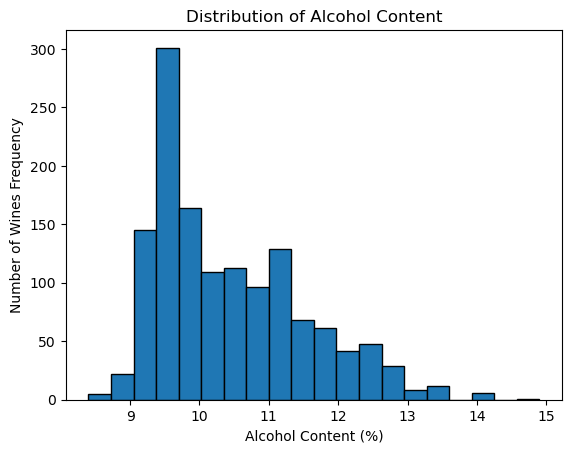

In [ ]:
new_wine_data["alcohol"].plot.hist(bins=20, edgecolor="black", title="Smoothed Distribution of Alcohol Content")
# PLT will help you lable the axes
plt.xlabel("Alcohol Content (%)")
plt.ylabel("Number of Wines Frequency")
# to show the graph
plt.show()

- So the wine has been concentrated between 9% and 13%. and its roughly bell shaped

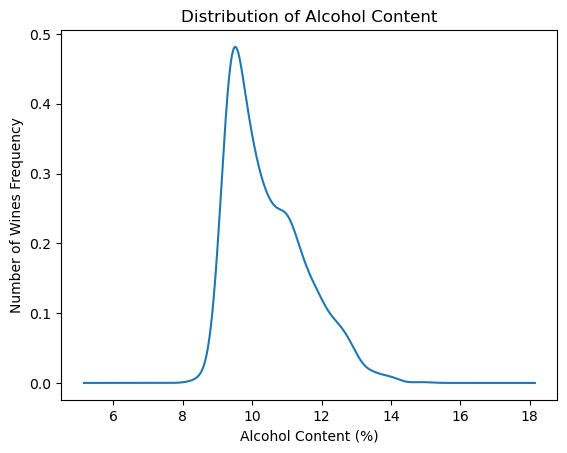

In [28]:
new_wine_data["alcohol"].plot.kde(title="Distribution of Alcohol Content")
# PLT will help you lable the axes
plt.xlabel("Alcohol Content (%)")
plt.ylabel("Number of Wines Frequency")
# to show the graph
plt.show()

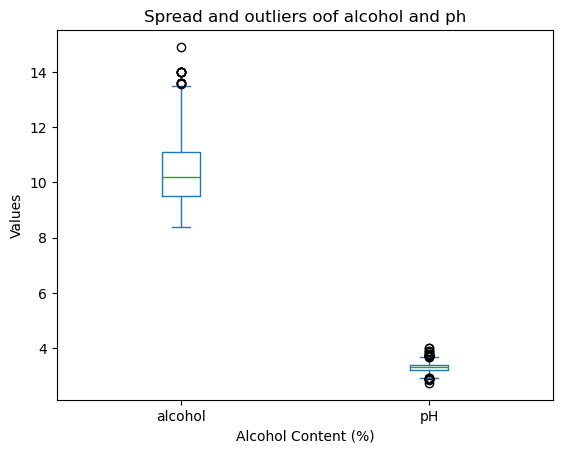

In [29]:
new_wine_data[["alcohol","pH"]].plot.box(title="Spread and outliers oof alcohol and ph")
# PLT will help you lable the axes
plt.xlabel("Alcohol Content (%)")
plt.ylabel("Values")
# to show the graph
plt.show()

Story: the ph is tighlty distributed byt has outliers on the hiher end outliers
# Bivariate

<Axes: title={'center': 'Alcohol vs Qulaity'}, xlabel='alcohol', ylabel='quality'>

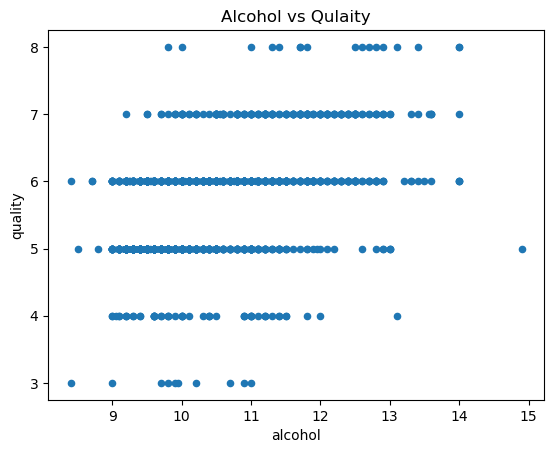

In [31]:
new_wine_data.plot.scatter(x="alcohol", y="quality", title="Alcohol vs Qulaity")

<Axes: title={'center': 'thats it'}, xlabel='alcohol', ylabel='quality'>

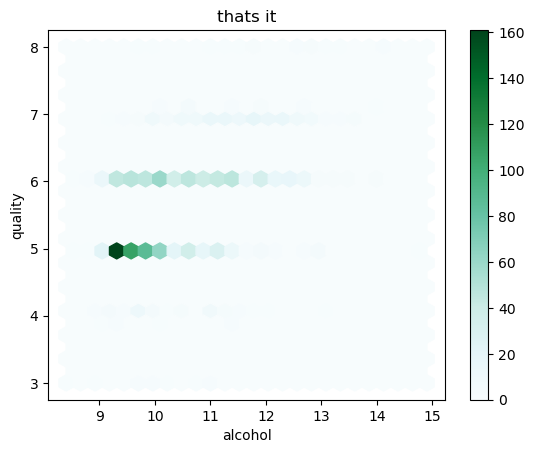

In [32]:
new_wine_data.plot.hexbin(x="alcohol",y="quality",gridsize=25,title="thats it")